## Importing Libraries

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

## Read file in python

In [135]:

# Specify the path to your Excel file
file_path = "D:\\Data Science Intern\\Dataset - Copy.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame
df.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [19]:
# Column names
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Target'],
      dtype='object')

In [20]:
# Number of rows(Obsercations) and columns(features):
df.shape

(12330, 18)

In [21]:
df['Target'].value_counts()

Target
False    10422
True      1908
Name: count, dtype: int64

## Result : Here are significantly more False values (10,422) compared to True values (1,908)

In [23]:
# data cleaning
(df.isnull().sum())  # Check for missing values

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Target                     0
dtype: int64

## Result : There is no missing values in data

In [139]:
df['Weekend'] = df['Weekend'].replace({True:1,False:0})   # 1 for weekend and 0 for not weekend days
df['VisitorType'] = df['VisitorType'].replace({'Returning_Visitor':1,'New_Visitor':0,'Other':2})  # 1 for Returning_visitor , 0 for new visitor

C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\383356751.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weekend'] = df['Weekend'].replace({True:1,False:0})   # 1 for weekend and 0 for not weekend days
C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\383356751.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VisitorType'] = df['VisitorType'].replace({'Returning_Visitor':1,'New_Visitor':0,'Other':2})  # 1 for Returning_visitor , 0 for new visitor


# Exploratory Data Analysis(EDA) on the dataset 

In [26]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Target
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [27]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Target'],
      dtype='object')

In [28]:
# Getting the statistical measures of the data
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Visualizations :

# *Univariate Analysis :

# 1.Histogram of Adminsistrative duration,Product related duration,Exist Rates, Bounce rates

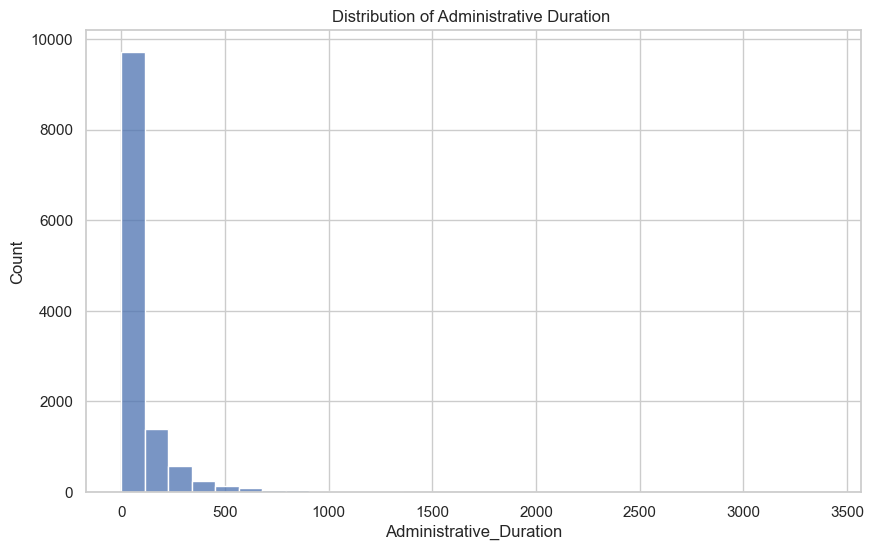

In [101]:
# Distribution of Administrative duration :
plt.figure(figsize=(10, 6))
sns.histplot(df['Administrative_Duration'], bins=30)
plt.title('Distribution of Administrative Duration ')
plt.show()

### Conclusion : A positively skewed distribution of the Administrative_Duration variable indicates that most visits have shorter administrative durations, while a few visits have much longer durations. 

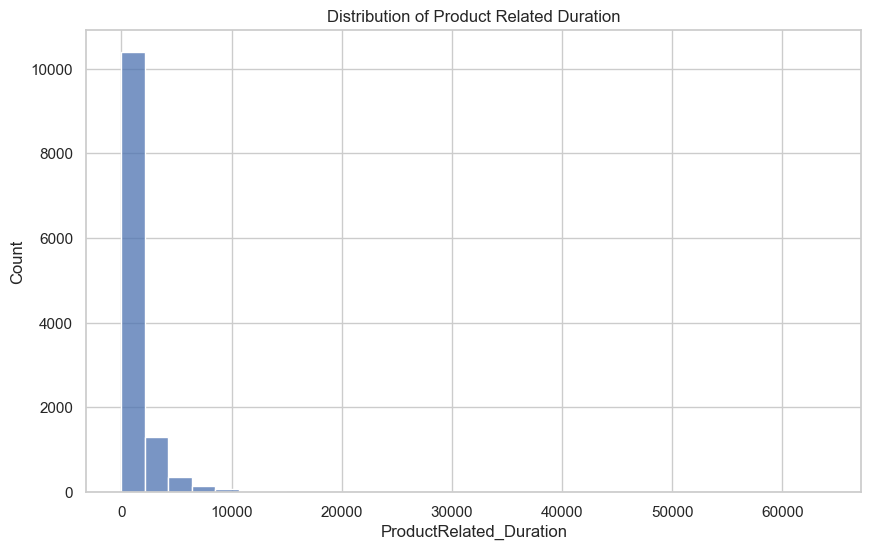

In [103]:
# Distribution of Product Related Duration :
plt.figure(figsize=(10, 6))
sns.histplot(df['ProductRelated_Duration'], bins=30)
plt.title('Distribution of Product Related Duration')
plt.show()

### Conclusion: A positively skewed distribution of the Productrelated_Duration variable indicates that most visits have shorter product related durations, while a few visits have much longer durations.

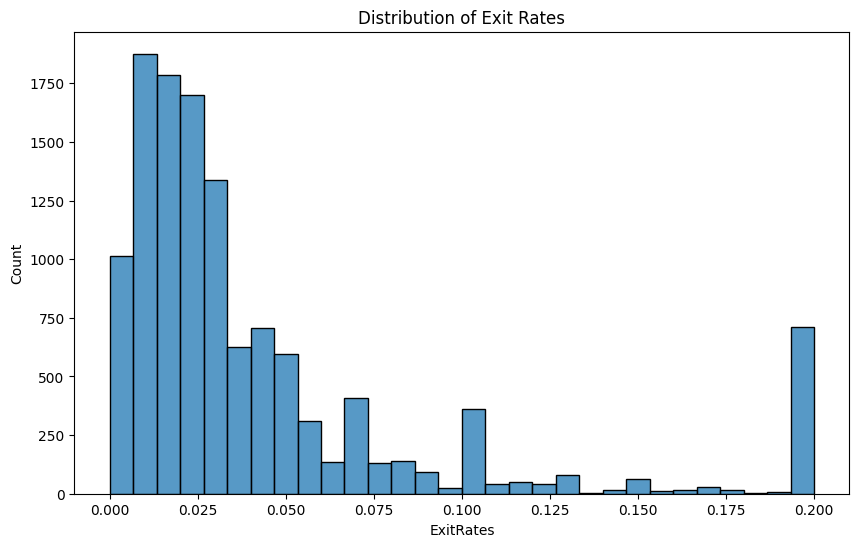

In [33]:
# Distribution of Exist rates :
plt.figure(figsize=(10, 6))
sns.histplot(df['ExitRates'], bins=30)
plt.title('Distribution of Exit Rates')
plt.show()


## Conclusion : The distribution of Exist rates is positively skewed, it indicates that most pages on the website have relatively low exit rates, with fewer pages having high exit rates

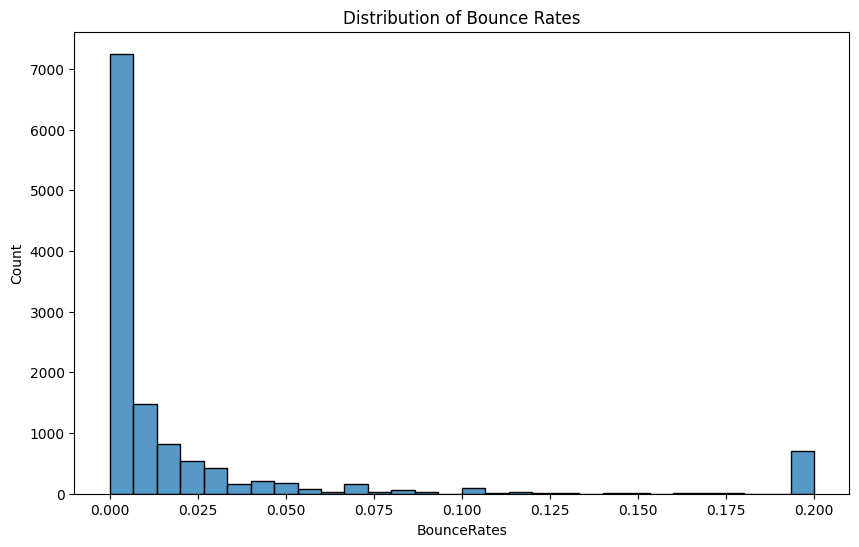

In [35]:
# Distribution of Bounce rates
plt.figure(figsize=(10, 6))
sns.histplot(df['BounceRates'], bins=30)
plt.title('Distribution of Bounce Rates')
plt.show()


## Conclusion : The distribution of Bounce rate is positively skewed, it suggests that most pages on the website have low bounce rates (many users interact more deeply with the site), while a small number of pages have much higher bounce rates (some pages have a high rate of users leaving without interacting).

#  2.Bar Chart of Browser, Visitor types, Weeekend

C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\2397276879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Browser', palette='viridis')


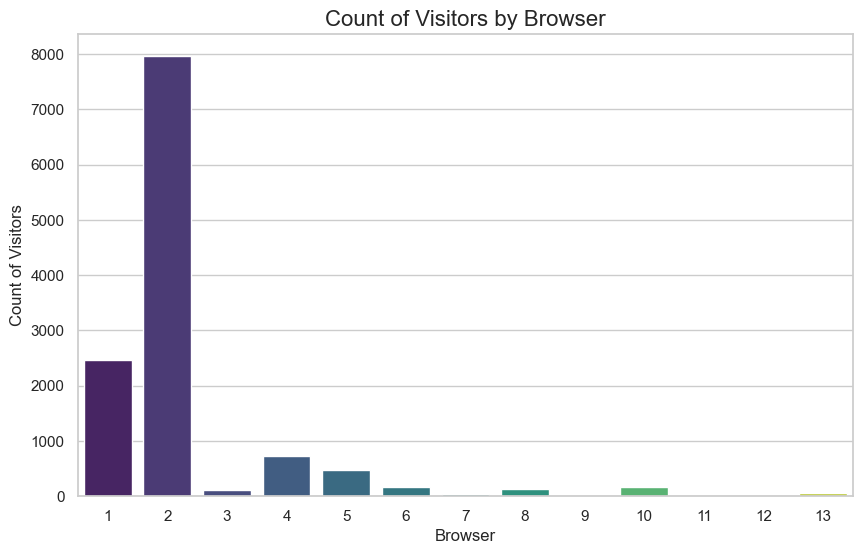

In [38]:

# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart for 'Browser' column
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Browser', palette='viridis')

# Add title and labels
plt.title('Count of Visitors by Browser', fontsize=16)
plt.xlabel('Browser', fontsize=12)
plt.ylabel('Count of Visitors', fontsize=12)

# Display the plot
plt.show()

## Conclusion : There are total 13 different browsers. The browser type 2 is most commonly used by consumers to visited page(website)

In [40]:
# Renaming row values in Visitor type column
df['VisitorType'] = df['VisitorType'].replace({'Returning_Visitor':1,'New_Visitor':0})  # 1 for Returning_visitor , 0 for new visitor

C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\560170163.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='VisitorType', palette='viridis')


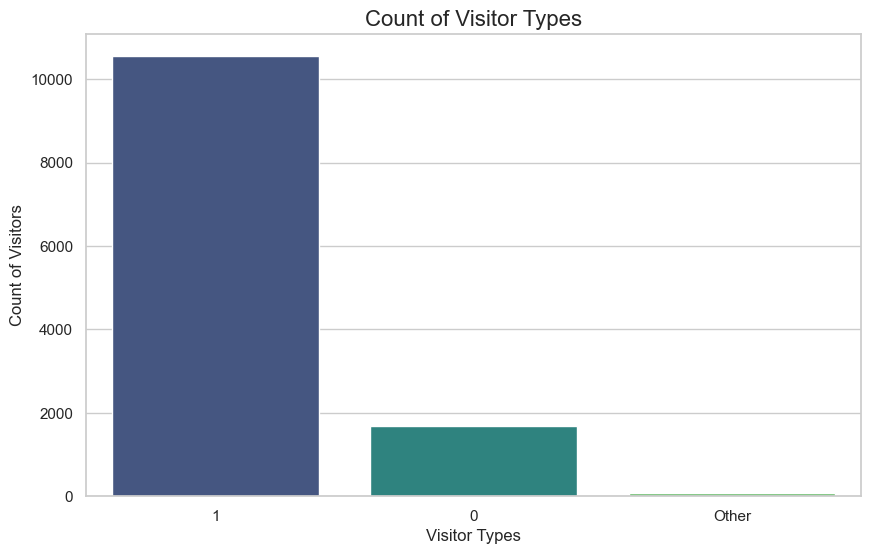

In [41]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart for 'Visitor Type' column
plt.figure(figsize=(10,6))
sns.countplot(data= df, x='VisitorType', palette='viridis')

# Add title and labels
plt.title('Count of Visitor Types', fontsize=16)
plt.xlabel('Visitor Types', fontsize=12)
plt.ylabel('Count of Visitors', fontsize=12)

# Display the plot
plt.show()

## Conclusion : 1 means Returning visitors and 0 means new visitors. Here we can see that returning visitors(regular visitors) are comparitively high visited to the website than the new visitor.

In [43]:
df['Weekend'] = df['Weekend'].replace({True:1,False:0})

C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\2676617088.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Weekend'] = df['Weekend'].replace({True:1,False:0})


C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\3795971302.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df, x='Weekend', palette='viridis')


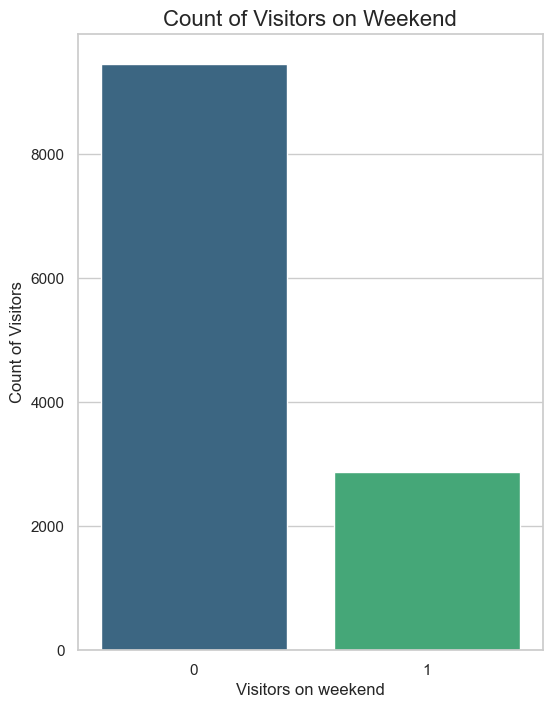

In [44]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar Chart for 'Browser' column
plt.figure(figsize=(6,8))
sns.countplot(data= df, x='Weekend', palette='viridis')

# Add title and labels
plt.title('Count of Visitors on Weekend', fontsize=16)
plt.xlabel('Visitors on weekend', fontsize=12)
plt.ylabel('Count of Visitors', fontsize=12)

# Display the plot
plt.show()

### Conclusion : 0 means Non-Weekend days and 1 means Weekend,The Bar chart shows that the number of visitors to the website on non-weekend days is comparatively higher than the number of visitors on weekend days

# 3. Pie Chart for Visitor types, Weekend

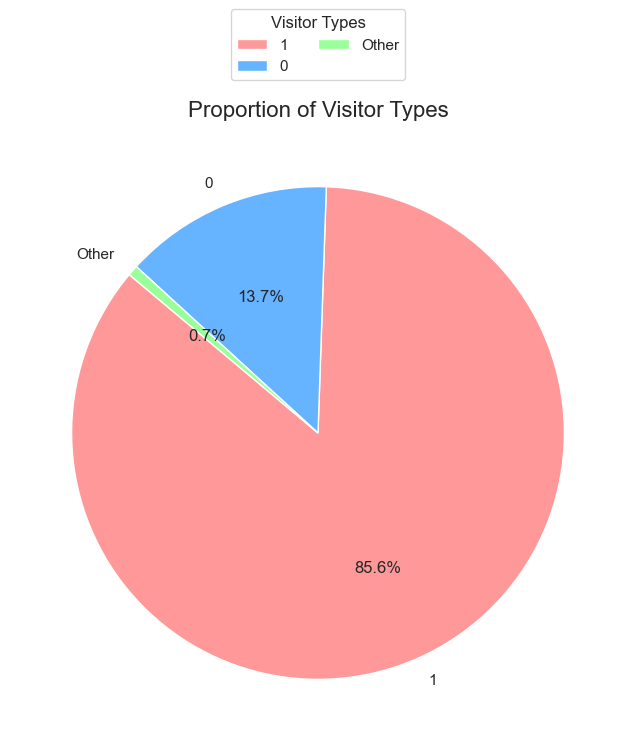

In [47]:


# Count the occurrences of each category in the 'VisitorType' column
visitor_counts = df['VisitorType'].value_counts()

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Add more colors as needed

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(visitor_counts, labels=visitor_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

# Add a title
plt.title('Proportion of Visitor Types', fontsize=16)

# Add a legend above the pie chart
plt.legend(visitor_counts.index, title='Visitor Types', loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# Display the plot
plt.show()


### Conclusion :  Here we can see that returning visitors(regular visitors) are comparatively high visited to the website than the new visitor.

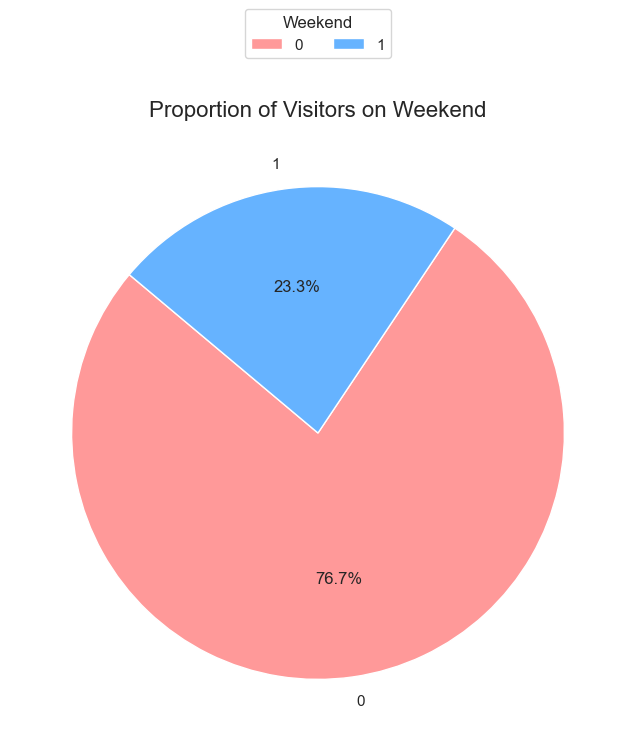

In [49]:


# Count the occurrences of each category in the 'Weekend' column
weekend_counts = df['Weekend'].value_counts()

# Define custom colors
custom_colors = ['#ff9999', '#66b3ff']  # Two colors for two categories (e.g., Yes and No)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weekend_counts, labels=weekend_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors)

# Add a title
plt.title('Proportion of Visitors on Weekend', fontsize=16)

# Add a legend above the pie chart
plt.legend(weekend_counts.index, title='Weekend', loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=2)

# Display the plot
plt.show()


### Conclusion : The Pie chart shows that the number of visitors to the website on non-weekend days is comparatively higher than the number of visitors on weekend days

# 4. Boxplot for Administrative_Duration, Informational_Duration, ProductRelated_Duration

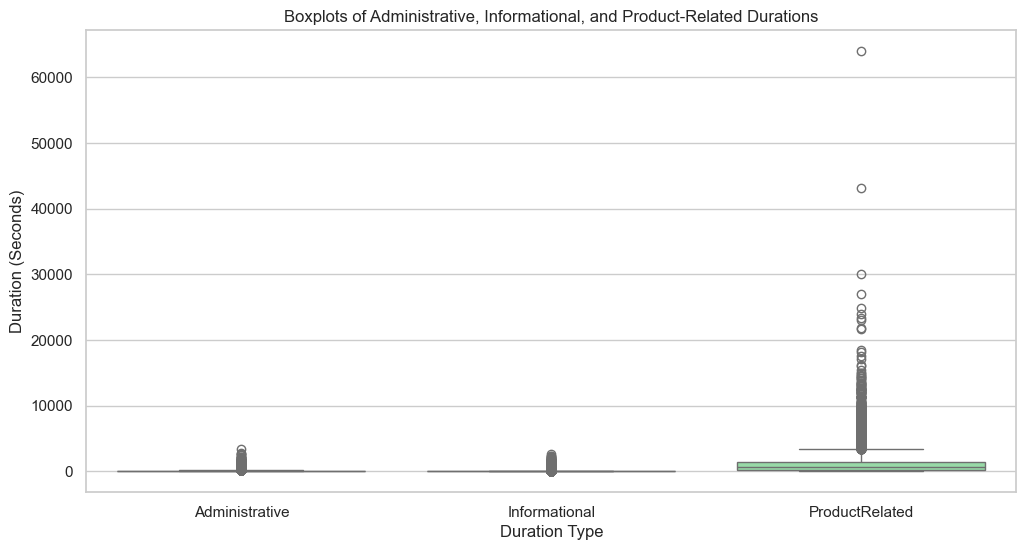

In [110]:
# Define the variables you want to plot
variables = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[variables], palette="pastel")

plt.title('Boxplots of Administrative, Informational, and Product-Related Durations')
plt.xlabel('Duration Type')
plt.ylabel('Duration (Seconds)')
plt.xticks([0, 1, 2], ['Administrative', 'Informational', 'ProductRelated'])  # Customize labels if needed
plt.show()

## General Observations :
### Y-axis (Duration in Seconds): The vertical axis represents the duration, ranging from 0 to over 60,000 seconds.
### X-axis (Duration Type): It shows the different duration types: Administrative, Informational, and Product-Related.

# Conclusions :
### (i)The median duration is near 0, indicating most visits had minimal time spent on administrative pages and informational pages.
### (ii) Product-Related pages show much higher user engagement than Administrative or Informational pages, as reflected in the higher median and more significant spread of durations.

# *Bivariative Analysis

In [52]:
## 1) Scatterplot

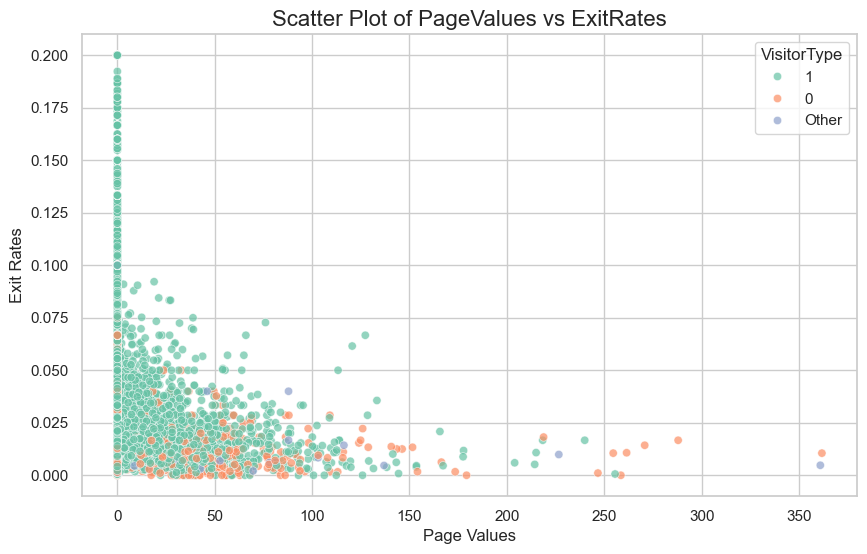

In [53]:
# Create a scatter plot to observe the relationship between PageValues and ExitRates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PageValues', y='ExitRates', hue='VisitorType', palette='Set2', alpha=0.7)

# Add title and labels
plt.title('Scatter Plot of PageValues vs ExitRates', fontsize=16)
plt.xlabel('Page Values', fontsize=12)
plt.ylabel('Exit Rates', fontsize=12)

# Display the plot
plt.show()

### Conclusion : There is positive correlation between Exist rates and Page Values. And here we can see that for low exist rate there is high page value.

## 2)Heatmap

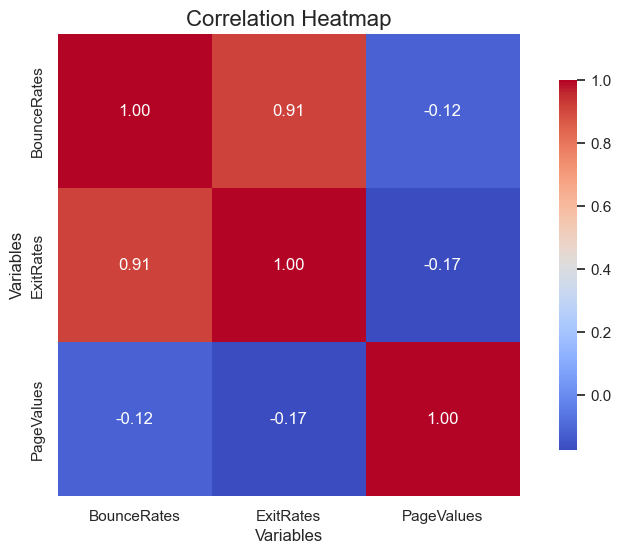

In [56]:
# Select the continuous variables for correlation
continuous_vars = df[['BounceRates', 'ExitRates', 'PageValues']]

# Calculate the correlation matrix
correlation_matrix = continuous_vars.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add title and labels
plt.title('Correlation Heatmap', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Display the plot
plt.show()

### Conclusion : (i) There is high positive linear correlation  between Exist rates and Bounce rates
###             (ii) There is low negative correlation  between Exist rates and Page values
###             (iii)There is low negative correlation  between Bounce rates and Page values

## 3) Boxplot

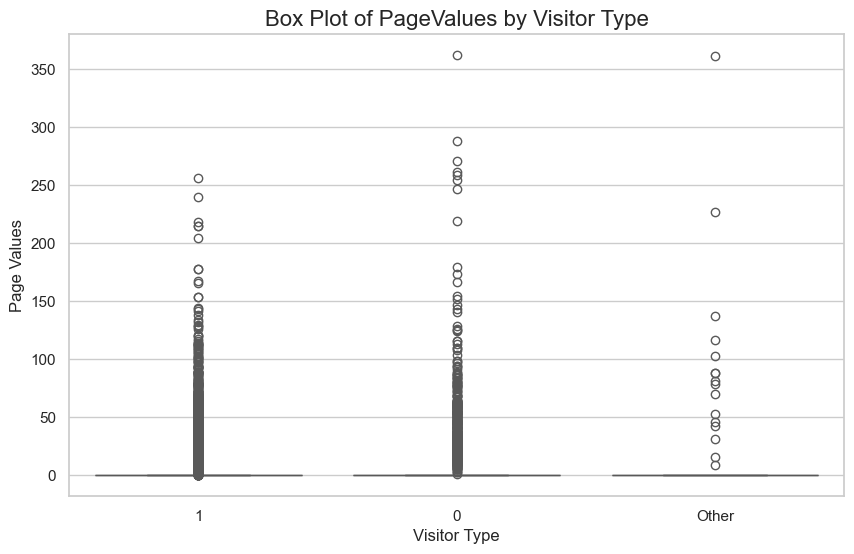

In [59]:

# Create a box plot to compare PageValues across VisitorType
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='VisitorType', y='PageValues', hue='VisitorType', palette='Set2', legend=False)

# Add title and labels
plt.title('Box Plot of PageValues by Visitor Type', fontsize=16)
plt.xlabel('Visitor Type', fontsize=12)
plt.ylabel('Page Values', fontsize=12)

# Display the plot
plt.show()


In [158]:
# Rename row values in 'Month' column
df['Month'] = df['Month'].replace({'Aug':1,'Dec':2,'Feb':3,'Jul':4,'June':5,'Mar':6,'May':7,'Nov':8,'Oct':9,'Sep':10})

C:\Users\DELL\AppData\Local\Temp\ipykernel_22516\2369013315.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Month'] = df['Month'].replace({'Aug':1,'Dec':2,'Feb':3,'Jul':4,'June':5,'Mar':6,'May':7,'Nov':8,'Oct':9,'Sep':10})


In [160]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Target'],
      dtype='object')

# Features selection :

## (i) Correlation Matrix with Heatmap :

In [187]:
df1 = df[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay','Target']]

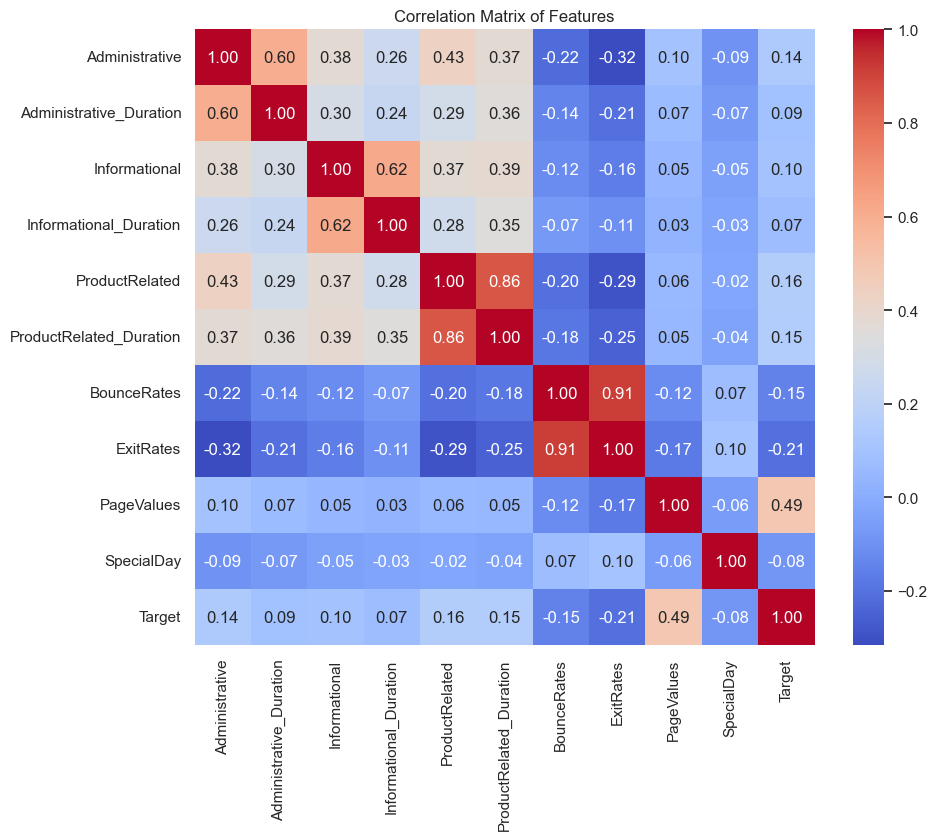

In [189]:


# Calculate the correlation matrix
correlation_matrix = df1.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()


# Conclusion : 
## (i)There are  low positive correlation between target variables and 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Month', 'Browser','Weekend'  
## (ii) There are comparatively high  positive correlation between target variables and Page values other features. 
## (iii) There are low  negaitve correlation between target variables and Exist rates,Bounce rates,Visitor Type 
## (iv) 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'Month', 'Browser','Weekend',Exist rates,Bounce rates,Visitor Type are important features,they have influence on target variable

## (ii) Chi-Square test

In [183]:
import pandas as pd
from scipy.stats import chi2_contingency    # Chi square for association

# Ho : There is no association between two categorical variables
# H1 : There is association between two categorical variables


# Create a contingency table (cross-tabulation) between two categorical variables
# Example: Categorical variables 'VisitorType' and 'Target'
contingency_table = pd.crosstab(df['VisitorType'], df['Target'])

# Perform the Chi-Square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Output the test results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Check if the result is statistically significant at a 5% significance level
alpha = 0.05
if p_val < alpha:
    print("The variables are associated (reject the null hypothesis).")
else:
    print("The variables are not associated (fail to reject the null hypothesis).")


Chi-Square Statistic: 135.2519228192047
P-Value: 4.269904152293867e-30
Degrees of Freedom: 2
Expected Frequencies:
[[1431.86277372  262.13722628]
 [8918.29051095 1632.70948905]
 [  71.84671533   13.15328467]]
The variables are associated (reject the null hypothesis).


## Perform Chi-Square test for Multiple  Categorical Features :

In [197]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your dataset is already loaded into a DataFrame 'df'
# df = pd.read_csv('your_dataset.csv')

# Specify the target variable
target_variable = 'Target'

# Specify the categorical features you want to test (e.g., 'OperatingSystems', 'Browser', etc.)
categorical_features = ['Month','OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

# Perform Chi-Square test for each categorical feature
chi_square_results = {}

for feature in categorical_features:
    # Create a contingency table between the feature and the target variable
    contingency_table = pd.crosstab(df[feature], df[target_variable])

    # Perform the Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Store the results in a dictionary
    chi_square_results[feature] = {'Chi-Square Statistic': chi2_stat, 'P-Value': p_val, 'Degrees of Freedom': dof}

# Convert the results dictionary into a DataFrame for better readability
chi_square_df = pd.DataFrame(chi_square_results).T

# Print the results
print(chi_square_df)

# Optionally, filter the features with p-values below the significance level (alpha = 0.05)
significant_features = chi_square_df[chi_square_df['P-Value'] < 0.05]
print("\nSignificant Features (p-value < 0.05):")
print(significant_features)


                  Chi-Square Statistic       P-Value  Degrees of Freedom
Month                       384.934762  2.238786e-77                 9.0
OperatingSystems             75.027056  1.416094e-13                 7.0
Browser                      27.715299  6.087543e-03                12.0
Region                        9.252751  3.214250e-01                 8.0
TrafficType                 373.145565  1.652735e-67                19.0
VisitorType                 135.251923  4.269904e-30                 2.0
Weekend                      10.390978  1.266325e-03                 1.0

Significant Features (p-value < 0.05):
                  Chi-Square Statistic       P-Value  Degrees of Freedom
Month                       384.934762  2.238786e-77                 9.0
OperatingSystems             75.027056  1.416094e-13                 7.0
Browser                      27.715299  6.087543e-03                12.0
TrafficType                 373.145565  1.652735e-67                19.0
VisitorType

## Conclusion :Month, Operating Systems, Browser,Traffic Type,Visitor Type,Weekend  are significant (categorical) features influence the target variable.

# Q.1 What is the distribution of the Target variable?

In [203]:
df['Target'] = df['Target'].replace({True:1,False:0})


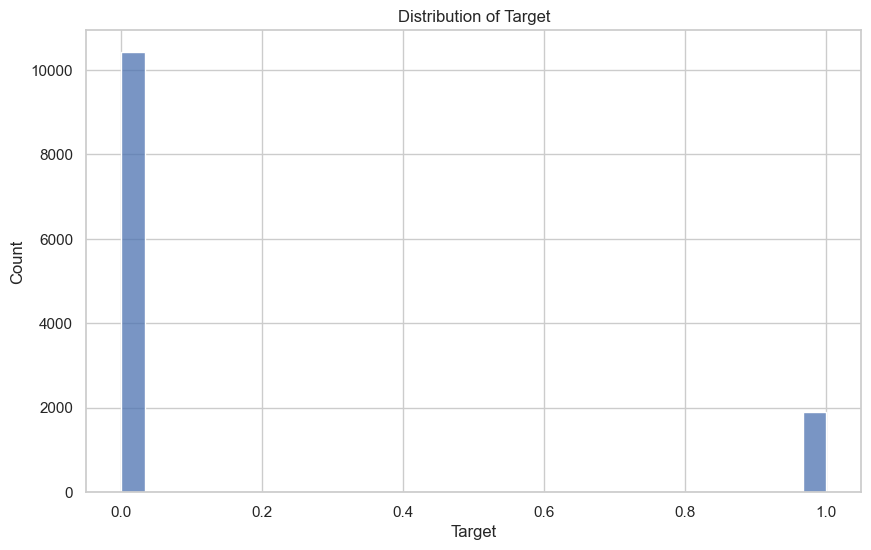

In [205]:
# Distribution of Target features :
plt.figure(figsize=(10, 6))
sns.histplot(df['Target'], bins=30)
plt.title('Distribution of Target')
plt.show()

#  the Chi-Square Goodness of Fit Test:

In [208]:
import numpy as np

# Define the probability of success (p)
p = 0.5  # Probability of 1 (success); adjust as needed

# Define the number of samples to generate
n_samples = 12330

# Generate Bernoulli-distributed random numbers
# Use np.random.binomial with n=1 to simulate Bernoulli trials
bernoulli_samples = np.random.binomial(n=1, p=p, size=n_samples)

# Display the samples
print(bernoulli_samples)


[1 1 1 ... 1 1 1]


In [212]:
bernoulli_samples

array([1, 1, 1, ..., 1, 1, 1])

In [214]:
from scipy.stats import kstest, bernoulli
import numpy as np

# Sample Bernoulli data
data = df['Target'] # Empirical Bernoulli data, p=0.5

# Generate a theoretical Bernoulli distribution for comparison
# This generates 0's and 1's with the same probability as in 'data'
theoretical_sample = bernoulli.rvs(p=0.5, size=12330)

# Perform the K-S test
stat, p_val = kstest(data, theoretical_sample)

print("K-S Statistic:", stat)
print("P-Value:", p_val)

# Interpretation
alpha = 0.05
if p_val > alpha:
    print("Data likely follows a Bernoulli distribution with p = 0.5.")
else:
    print("Data likely does not follow a Bernoulli distribution with p = 0.5.")


K-S Statistic: 0.34841849148418497
P-Value: 0.0
Data likely does not follow a Bernoulli distribution with p = 0.5.
